# Basic Python
## Part 1: Logic and String Manipulation

**1.a The DNA Helix Printer**
Write a function `print_helix(n, turns)` where `n` is the width of the helix and `turns` is the number of full cycles. The helix is formed by two strands.
* The strands oscillate using a sine-wave-like pattern.
* The characters for the strands should cycle through `A, C, G, T`.
* **Constraint:** You must handle the spacing dynamically.

**Example Output (`n=4, turns=1`):**
```text
A      A
 C    C
  G  G
   TT
  A  A
 C    C
G      G

In [124]:
def print_helix(n, turns):
    f = n / 4
    for i in range(turns):
        for j in range(4):
            x = ''
            if j == 0:
                x = 'A'
            elif j == 1:
                x = 'C'
            elif j == 2:
                x = 'G'
            else:
                x = 'T'
            s = (' ' * int(f * j)) + x + (' ' * int(2 * f * (3 - j))) + x
            print(s)
        for j in range(3):
            x = ''
            if j == 0:
                x = 'A'
            elif j == 1:
                x = 'C'
            elif j == 2:
                x = 'G'
            s = (' ' * int(f * (2 - j))) + x + (' ' * int(2 * f * (j + 1))) + x
            print(s)

# Test
print_helix(12, 2)

A                  A
   C            C
      G      G
         TT
      A      A
   C            C
G                  G
A                  A
   C            C
      G      G
         TT
      A      A
   C            C
G                  G


**1.b The Custom Sorter**
Write a function `sort_strings(s_list)` that takes a list of strings and sorts them based on the following priority rules:
1.  **Primary:** Length of the string (Ascending).
2.  **Secondary:** Number of distinct vowels (a, e, i, o, u) present in the string (Descending).
3.  **Tertiary:** Alphabetical order (Ascending).

**Example:**
Input: `["apple", "banana", "kiwi", "sky", "aieou", "z"]`
Output: `['z', 'sky', 'kiwi', 'aieou', 'apple', 'banana']`

In [125]:
def sort_strings(s_list):
    l = []
    for s in s_list:
        a = len(s)
        b = 0
        if 'a' in s:
            b += 1
        if 'e' in s:
            b += 1
        if 'i' in s:
            b += 1
        if 'o' in s:
            b += 1
        if 'u' in s:
            b += 1
        l.append([len(s), -b, s])
    l = sorted(l)
    return [ele[2] for ele in l]

# Test
data = ["apple", "banana", "kiwi", "sky", "aieou", "z", "e"]
print(sort_strings(data))

['e', 'z', 'sky', 'kiwi', 'aieou', 'apple', 'banana']


## Part 2: Working with Data

Consider that you are processing raw data from a sensor in a physics lab. The sensor is noisy and occasionally malfunctions.

**Task:**
1.  Read the file ```sensor_logs.csv``` **without using Pandas**.
2.  **Filter:** Ignore rows where `status` is "ERR" OR `voltage` > 10.0.
3.  **Analysis:** Calculate the **Mean** and **Standard Deviation** for each sensor.

In [126]:
import math

def analyze_sensors(filename):
    f = open(filename)
    d = {}
    for i,line in enumerate(f):
        if i == 0:
            continue
        sep = line.split(",")
        sep[2] = float(sep[2])
        if "ERR" in sep[3] or sep[2] > 10:
            continue
        if sep[1] not in d.keys():
            d[sep[1]] = [sep[2], sep[2] * sep[2], 1]
        else:
            d[sep[1]][0] += sep[2]
            d[sep[1]][1] += sep[2] * sep[2]
            d[sep[1]][2] += 1
    for key in d.keys():
        d[key][0] /= d[key][2]
        d[key][1] = math.sqrt(d[key][1]/d[key][2] - d[key][0]**2)
        print(f"Sensor {key}, Mean: {d[key][0]}, Std: {d[key][1]}")



analyze_sensors("sensor_log.csv")

Sensor S3, Mean: 3.926935483870968, Std: 0.576793384792936
Sensor S1, Mean: 4.026486486486487, Std: 0.5427368891999653
Sensor S2, Mean: 4.055196078431373, Std: 0.5826187169979783
Sensor S4, Mean: 3.973437499999998, Std: 0.5837733366588171


## SciPy

### Task 1

Find the positive root of the transcendental equation: $x^2 - 5\sin(x) - 2 = 0$

In [127]:
# TODO 1
import numpy as np
from scipy.optimize import root_scalar
def f(x):
    return x*x - 5*np.sin(x) - 2

sol = root_scalar(f, bracket = [0, 3], method = 'brentq') #IVT, at x = 0, it is -2, and at x = sqrt7 it is definitely >= 0 (+ve root is needed)
print(sol.root)

2.3542389483370147


### Task 2
Simulate a radioactive decay chain: $A \to B \to C$ (Stable).

* $\frac{dA}{dt} = -k_1 A$
* $\frac{dB}{dt} = k_1 A - k_2 B$
* $\frac{dC}{dt} = k_2 B$

Given $k_1 = 0.5$, $k_2 = 0.1$. Initial conditions: $A_0 = 100$, $B_0 = 0$, $C_0 = 0$.

You have to find the concentration of **B at t = 5.0**.

In [128]:
# TODO 2
# You can define any helper function if needed
import numpy as np
from scipy.linalg import expm
k1 = 0.5
k2 = 0.1
M = np.array([[-k1, 0, 0],
              [k1, -k2, 0],
              [0, k2, 0]])

x_5 = np.matmul(expm(M * 5.0), [[100], [0], [0]])

print(x_5[1])

[65.55570764]


# The N-Body Problem
In classical mechanics, the Two-Body problem (e.g., Earth-Moon) has an analytical solution. However, adding a third body makes the system unsolvable by pen and paper. To predict the motion of star clusters or galaxies, we solve the **N-Body problem** numerically.

**Objective:** Your task is to implement a vectorized N-Body simulation using Python and NumPy.

**Important: You are not allowed to use any loops for physics calculations.**

### The Physics & The Numerical Problem

The acceleration $\vec{a}_i$ acting on particle $i$ is the sum of gravitational forces from all other particles $j$.
$$\vec{a}_i = \sum_{j \neq i} G \cdot m_j \cdot \frac{\vec{r}_j - \vec{r}_i}{|\vec{r}_j - \vec{r}_i|^3}$$

**The Numerical Issue:**
As particles get close, $|\vec{r}_j - \vec{r}_i| \to 0$, causing the force to shoot to infinity (Singularity). In a discrete time-step simulation, this flings particles out of the galaxy at unphysical speeds.

**Q. Explain, how would you overcome this issue (you may introduce additional parameters if needed)?**

**Q. Does the value of your param ```affect``` your results? If they do then explain how.**

### Setup and Initialization

Run this cell to import libraries and set up the simulation environment. **Do not modify this cell.**

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Simulation Parameters

G = 1.0           # Gravitational Constant
PARAM = 0.1       # Your parameter (if needed)
DT = 0.01         # Time step
STEPS = 200       # Number of steps
N_PARTICLES = 100 # Number of particles

def generate_initial_state(N, seed=42):
    """
    Generates N random particles.
    Returns:
        positions: (N, 2) array
        velocities: (N, 2) array
        masses: (N,) array
    """
    np.random.seed(seed)
    positions = np.random.randn(N, 2)
    velocities = np.random.randn(N, 2) * 0.5
    masses = np.random.rand(N) + 0.5 # Masses between 0.5 and 1.5
    return positions, velocities, masses

In [ ]:
# TODO 1 : Calculates the net acceleration on every particle due to every other particle.
# You should return accelerations as a (N, 2) numpy array representing a_x, a_y
import math
def norm(position, param=0.1):
    return math.sqrt(position[0] ** 2 + position[1] ** 2) + param*param

def calculate_accelerations(positions, masses, G=1.0, param=0.1):

    # TODO 1.1: Calculate the displacement vector matrix (N, N, 2)
    # Use broadcasting preferably it would be awarded accordidngly
    N = len(positions)
    disp = np.zeros((N,N,2))
    dist_sq = np.zeros((N,N))
    accn = np.zeros((N,2))
    for i,position in enumerate(positions):
        for j,position2 in enumerate(positions):
            if positions[i][0]!= positions[j][0] or positions[i][1] != positions[j][1]:    
                disp[i][j] = (positions[j] - positions[i]) / norm(positions[j] - positions[i])
            else:
                disp[i][j] = positions[j] - positions[i]
            dist_sq[i][j] = norm(positions[j] - positions[i]) ** 2
            if (dist_sq[i][j] != 0):
                accn[i] += G * masses[j] * disp[i][j] / dist_sq[i][j]
    # TODO 1.2: Calculate the distance squared matrix (N, N)

    # TODO 1.3: Find the acceleration (N, 2)
    
    return accn # Placeholder

In [60]:
# TODO 2: Updates the simulation by one timestep.

def symplectic_euler_step(positions, velocities, accelerations, dt):
    # TODO 2.1: Update velocities and then positions using the formulas above.
    positions += velocities * dt
    velocities += accelerations * dt
    return positions, velocities

## Visualization

If your code is correct, this block will run the simulation and produce a plot.

**Note:** This block checks if your functions are implemented. If they return `None` or zeros, the plot will look static or empty.

Simulation of 100 particles for 200 steps took: 22.0007s


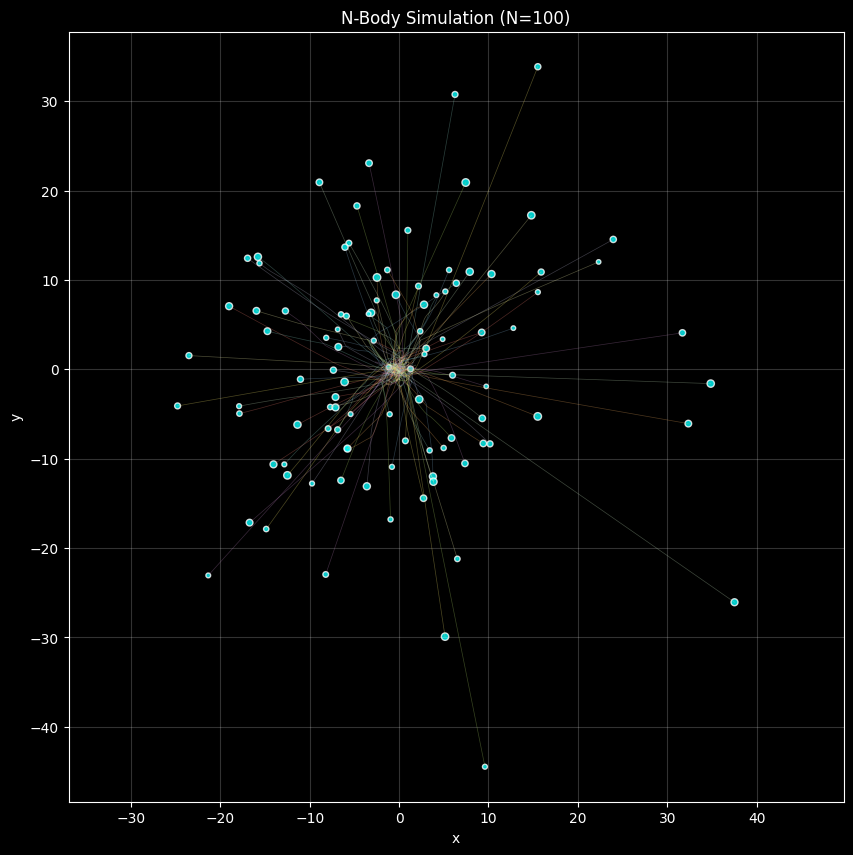

In [79]:
def run_simulation(N=100, steps=200, dt=0.01):
    positions, velocities, masses = generate_initial_state(N)
    
    trajectory_history = []
    trajectory_history.append(positions.copy())
    
    start_time = time.time()
    
    for _ in range(steps):
        # Calculate forces
        acc = calculate_accelerations(positions, masses, G, PARAM)
        
        # Integrate
        positions, velocities = symplectic_euler_step(positions, velocities, acc, dt)
        
        # Store history
        trajectory_history.append(positions.copy())
        
    end_time = time.time()
    print(f"Simulation of {N} particles for {steps} steps took: {end_time - start_time:.4f}s")
    
    return np.array(trajectory_history), masses

# Main Simualtion
history, masses = run_simulation(N=N_PARTICLES, steps=STEPS, dt=DT)

plt.figure(figsize=(10, 10))
plt.style.use('dark_background')

for i in range(N_PARTICLES):
    plt.plot(history[:, i, 0], history[:, i, 1], alpha=0.3, lw=0.5)

# Plot final positions
plt.scatter(history[-1, :, 0], history[-1, :, 1], s=masses*20, c='cyan', alpha=0.8, edgecolors='white')

plt.title(f"N-Body Simulation (N={N_PARTICLES})")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True, alpha=0.2)
plt.axis('equal')
plt.show()

## Conservation of Energy

A good physics simulation must conserve energy. 
* **Kinetic Energy (T):** $T = \frac{1}{2} \sum m_i v_i^2$
* **Potential Energy (U):** $U = -\frac{1}{2} \sum_i \sum_{j \neq i} \frac{G m_i m_j}{r_{ij}}$

**Note that the energy functions can also change depending on how you chose the parameter, so if you make any such modification, explain that clearly.**

**Task:** Implement the energy calculation.

In [70]:
# TODO 3: Calculate the Total Energy (Kinetic + Potential).

def calculate_total_energy(positions, velocities, masses, G=1.0, param=0.1):
    # TODO 3.1: Calculate Kinetic Energy
    T = 0.0
    
    for velocity, mass in zip(velocities, masses):
        T += 0.5 * mass * norm(velocity) * norm(velocity)
    # TODO 3.2: Calculate Potential Energy
    # Hint: You can reuse the distance matrix logic from Task 1
    U = 0.0
    N = len(positions)
    dist = np.zeros((N,N))
    for i,position in enumerate(positions):
        for j,position2 in enumerate(positions):
            dist[i][j] = norm(positions[j] - positions[i])
            if (dist[i][j] != 0):
                U -= 0.5 * G * masses[j] * masses[i] / dist[i][j]
    return T + U

# Test for a simple 2-body static case
pos_test = np.array([[1.0, 0.0], [-1.0, 0.0]])
vel_test = np.array([[0.0, 0.0], [0.0, 0.0]])
mass_test = np.array([1.0, 1.0])

E_check = calculate_total_energy(pos_test, vel_test, mass_test, G=1.0, param=0.0)
print(f"Test Case Energy: {E_check:.4f} (Expected: -0.500)")

Test Case Energy: -0.5000 (Expected: -0.500)


## Advanced Integration with SciPy

In computational physics, we often use established libraries to verify our manual implementations. SciPy's `solve_ivp` is a powerful integrator with adaptive time-stepping.

**The Challenge:** `solve_ivp` requires the system state to be a **1D array**. You currently have 2D arrays for positions and velocities.

**TODO:**
1.  Flatten your initial `positions` and `velocities` into a single 1D array `y0`.
2.  Implement the derivative function `nbody_ode(t, y, masses, ...)` which:
    * Unpacks the 1D `y` back into `positions` and `velocities`.
    * Calculates `accelerations` using your function from Task 1.
    * Returns the derivatives (velocities and accelerations) as a flattened 1D array.
3.  Run the solver.

## 8. Task 4: Advanced Integration with SciPy
Run the simulation using `solve_ivp`.

In [81]:
from scipy.integrate import solve_ivp

# TODO 4: Implement a function nbody_ode that bridges the gap between scipy 1D requirement and your 2D logic.

def nbody_ode(t, y, masses, G):
    """
    This function takes in
        t: float, current time
        y: 1D numpy array, current state vector
        masses: (N,) array
        G: float

    This should return an array (dydt) i.e.
        1D numpy array, which time derivative of the state vector
    """
    
    # TODO 4.1: Unpack the 1D state vector 'y' into positions (N, 2) and velocities (N, 2)
    positions = np.array([[y[i], y[i+1]] for i in range(0, len(y)//2, 2)])
    velocities = np.array([[y[i], y[i+1]] for i in range(len(y)//2, len(y), 2)])
    # TODO 4.2: Calculate accelerations
    # Hint: you can reuse your previous functio)
    accn = calculate_accelerations(positions, masses, G)
    
    # TODO 4.3: Pack the derivatives (velocities and accelerations) back into a 1D array
    onedarray = np.append(velocities.flatten(),accn.flatten())
    return onedarray # Placeholder

In [84]:
# TODO 5: Run the simulation using solve_ivp.

N_SCIPY = 10
pos_s, vel_s, mass_s = generate_initial_state(N_SCIPY)
t_span = (0, 2.0)
print(f"Running SciPy Integrator for N={N_SCIPY}...")

# TODO 5.1: Prepare the initial 1D state vector 'y0' from pos_s and vel_s

y0 = np.append(pos_s.flatten(), vel_s.flatten())

# TODO 5.2: Call solve_ivp

# sol = solve_ivp(...)
sol = solve_ivp(nbody_ode, t_span, y0, method = 'RK45', args=(mass_s, 1))

if sol:
    print(f"SciPy solved in {len(sol.t)} steps.")
    print(f"Final shape of solution: {sol.y.shape}")

Running SciPy Integrator for N=10...
SciPy solved in 218 steps.
Final shape of solution: (40, 218)


# Damped coupled oscillators

The bobs of two pendulums are connected by a spring, forming a coupled oscillator system. Real systems always have some damping, in which mechanical energy is slowly converted to heat. For this problem we model the damping as a force proportional to velocity. Assume that the spring is ideal and that the system is placed on the surface of an unknown extremely large planet. Let $\theta_1$ and $\theta_2$ denote the angles that pendulum strings make with the vertical and $t$ denote time. The equations governing the motion of the system can be written as

$$ \frac{d^2 \theta_1}{d t^2} = -c_1 \frac{d \theta_1}{d t} - k_1 \theta_1 -k_c (\theta_1 - \theta_2)$$
$$ \frac{d^2 \theta_2}{d t^2} = -c_2 \frac{d \theta_2}{d t} - k_2 \theta_2 -k_c (\theta_2 - \theta_1)$$

The file `data.csv` provides you measurements for $\theta_1$ and $\theta_2$ with time. Your task is to find $c_1, c_2, k_1, k_2, k_c$ using python (numpy and/or pandas). Note that the data might have noise and also be partially corruped due to limitations of measuring instruments.  Plot the values of $\theta_1$ and $\theta_2$ predicted using the constants calculated above against the measured values. Assume arbitrary (but consistent) unit system.

In [118]:
import numpy as np
from scipy.integrate import solve_ivp
data = open("data.csv")
t = []
theta1 = []
theta2 = []
theta1_dot = []
theta2_dot = []
theta1_dot_dot = []
theta2_dot_dot = []
for j,line in enumerate(data):
    if j == 0:
        continue
    spl = line.split(",")
    time = float(spl[0])
    th1 = float(spl[1])
    th2 = float(spl[2])
    t.append(time)
    theta1.append(th1)
    theta2.append(th2)
        
theta1 = np.array(theta1)
theta2 = np.array(theta2)
t = np.array(t)
theta1_dot = np.gradient(theta1, t)
theta2_dot = np.gradient(theta2, t)
theta1_dot_dot = np.gradient(theta1_dot, t)
theta2_dot_dot = np.gradient(theta2_dot, t)


X1 = np.column_stack([-theta1_dot, -theta1, -(theta1 - theta2)])
X2 = np.column_stack([-theta2_dot, -theta2, -(theta2 - theta1)])

c1, k1, kc1 = np.matmul(np.matmul(np.linalg.inv(np.matmul(X1.T, X1)),X1.T),theta1_dot_dot)
c2, k2, kc2 = np.matmul(np.matmul(np.linalg.inv(np.matmul(X2.T, X2)),X2.T),theta2_dot_dot)
kc = (kc1 + kc2)/2
print(c1, k1, c2, k2, kc)

7.137948705374562 182366.48017913313 -46.37004185338761 208098.81456814607 -55647.63786439707
